(0.0, 0.16293103448275861)

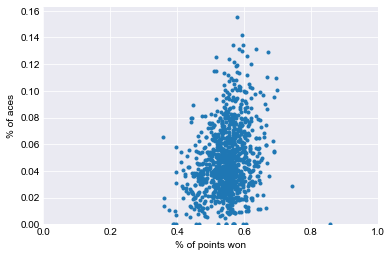

In [42]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

player = 'Roger Federer'
filename = 'data/{name}.csv'.format(name=player.replace(' ', '-'))
df = pd.read_csv(filename)

npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints

plt.plot(points, aces, '.')
plt.xlabel('% of points won')
plt.ylabel('% of aces')
plt.xlim(0., 1.)
plt.ylim(0.)

In [56]:
df_bis = pd.DataFrame({'points': points, 'aces': aces}).dropna()
# df_bis.tail()
df_bis.corr(method='pearson')

,aces,points
aces,1.000000,0.255457
points,0.255457,1.000000


In [67]:
df_bis['result'] = df_bis['points'] > df_bis['points'].median()
df_bis['manyaces'] = df_bis['aces'] > df_bis['aces'].median()

# pd.crosstab(df_bis['result'], df_bis['manyaces'])

st.chi2_contingency(pd.crosstab(df_bis['result'], df_bis['manyaces']))

pandas.core.frame.DataFrame